<a href="https://colab.research.google.com/github/tommasomncttn/NLP-Disaster-Tweet-Detection/blob/main/preprocessing/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install IPython
!pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 6.4 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstal

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import ydata_profiling as pp
from IPython.display import display


df = pd.read_csv("/content/drive/MyDrive/ML_proj/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/ML_proj/test.csv")

# Overview of  the data

In [ ]:
profile = pp.ProfileReport(df)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
display(profile)

# Finding proportion of Positive and Negatives target values in the training set


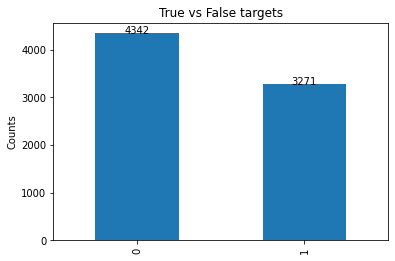

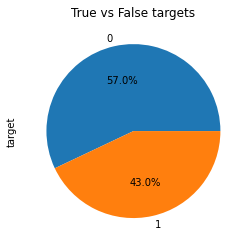

In [ ]:
#count how many positives and negatives lables in the dataset
target_counts = df['target'].value_counts()

# bar plot 
bar_plt = target_counts.plot(kind='bar')

bar_plt.set_title("True vs False targets")
bar_plt.set_ylabel("Counts")

for i, v in enumerate(target_counts):
    bar_plt.text(i, v+1, str(v), ha='center')

plt.show()

pie_plt = target_counts.plot(kind='pie', autopct='%1.1f%%')

pie_plt.set_title("True vs False targets")

plt.show()

# Finding number and proportion of missing values of "keywords" and "location" for both the training and test set

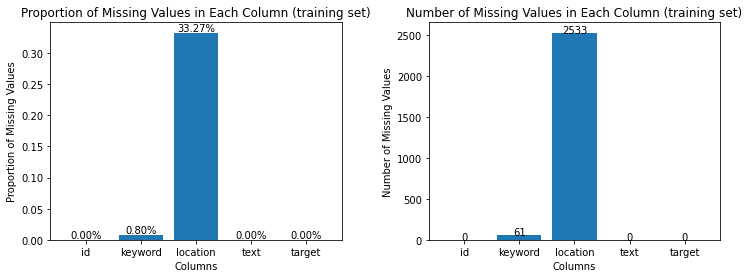

In [ ]:
prop_missing = df.isna().mean()
sum_missing = df.isna().sum()

# one row and two columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#barchart of PROPORTION of missing values
axs[0].bar(prop_missing.index, prop_missing)
axs[0].set_title('Proportion of Missing Values in Each Column (training set)')
axs[0].set_xlabel('Columns')
axs[0].set_ylabel('Proportion of Missing Values')
for i, v in enumerate(prop_missing):
    axs[0].annotate(f"{v:.2%}", xy=(i, v), ha='center', va='bottom')

#barchart of NUMBER of missing values
axs[1].bar(sum_missing.index, sum_missing)
axs[1].set_title('Number of Missing Values in Each Column (training set)')
axs[1].set_xlabel('Columns')
axs[1].set_ylabel('Number of Missing Values')
for i, v in enumerate(sum_missing):
    axs[1].annotate(v, xy=(i, v), ha='center')

# display the plot
fig.subplots_adjust(wspace=0.3)
plt.show()

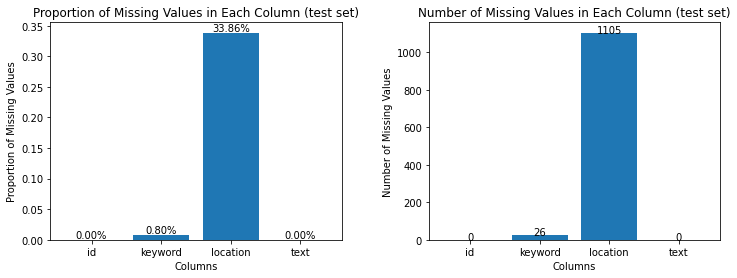

In [ ]:
prop_missing = df_test.isna().mean()
sum_missing = df_test.isna().sum()

# one row and two columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#barchart of PROPORTION of missing values
axs[0].bar(prop_missing.index, prop_missing)
axs[0].set_title('Proportion of Missing Values in Each Column (test set)')
axs[0].set_xlabel('Columns')
axs[0].set_ylabel('Proportion of Missing Values')
for i, v in enumerate(prop_missing):
    axs[0].annotate(f"{v:.2%}", xy=(i, v), ha='center', va='bottom')

#barchart of NUMBER of missing values
axs[1].bar(sum_missing.index, sum_missing)
axs[1].set_title('Number of Missing Values in Each Column (test set)')
axs[1].set_xlabel('Columns')
axs[1].set_ylabel('Number of Missing Values')
for i, v in enumerate(sum_missing):
    axs[1].annotate(v, xy=(i, v), ha='center')

# display the plot
fig.subplots_adjust(wspace=0.3)
plt.show()

Given the similarities in the proportion of the missing values in the two sets, they are most probably taken from the same sample.

# Finding the number of unique keywords and locations

In [ ]:
print(f'Unique values of keyword in train set : {df["keyword"].nunique()}')
print(f'Unique values of keyword in test set :{df_test["keyword"].nunique()}')
print(f'Unique values of location in train set : {df["location"].nunique()}')
print(f'Unique values of location in test set : {df_test["location"].nunique()}')

Unique values of keyword in train set : 221
Unique values of keyword in test set :221
Unique values of location in train set : 3341
Unique values of location in test set : 1602


The "location" data is often inconsistent and contains a large number of distinct values (probabliy because it is not automaticaly generated but inputted by the user), making it unsuitable for use as a feature.

# Finding the conditional probability of a positive labele given a certain keyword 

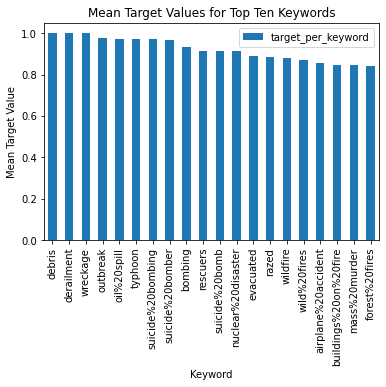

In [ ]:
df['target_per_keyword'] = df.groupby('keyword')['target'].transform('mean')

# Get the top ten keywords by mean target value
top_keywords = df.groupby('keyword')['target_per_keyword'].mean().nlargest(20).reset_index()

# Create a bar chart of the mean target values for the top ten keywords
top_keywords.plot(kind='bar', x='keyword', y='target_per_keyword')

# Add a title and axis labels
plt.title('Mean Target Values for Top Ten Keywords')
plt.xlabel('Keyword')
plt.ylabel('Mean Target Value')

# Show the plot
plt.show()



There is an obvious correlation between some keywords and the lable of the instance, therefore, it might be usefull to use "keyword" as feature

# Finding duplicates in the training set and their respective number of occurences

In [ ]:
df_duplicates = df.groupby(['text']).size().sort_values(ascending=False).head(30)
print(df_duplicates)

text
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...         10
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_      6
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                                6
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                       6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                   5
that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time                 4
To fight bioterrorism sir.                                                                                 

In [ ]:
num_duplicates = df["text"].duplicated().sum()
print("Total number of duplicates:", num_duplicates)

Total number of duplicates: 110


The total number of duplicates in the dataset amounts to 110

# Less usefull analysis

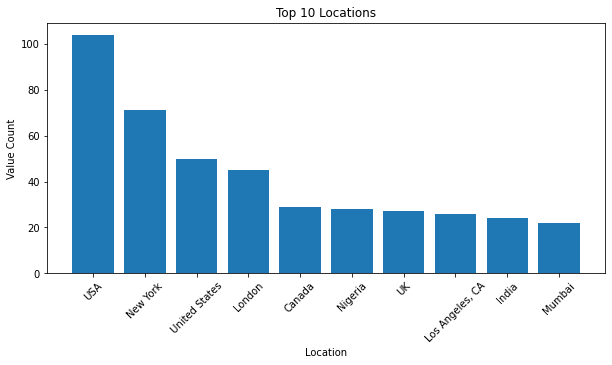

In [7]:
#plotting the top ten most common locations

top10_locations = df['location'].value_counts()[:10]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top10_locations.index, top10_locations.values)

# Set the title and axis labels
ax.set_title('Top 10 Locations')
ax.set_xlabel('Location')
ax.set_ylabel('Value Count')

# Adjust spacing between bars and rotate x-axis labels
plt.subplots_adjust(bottom=0.3)
plt.xticks(rotation=45)

# Display the plot
plt.show()

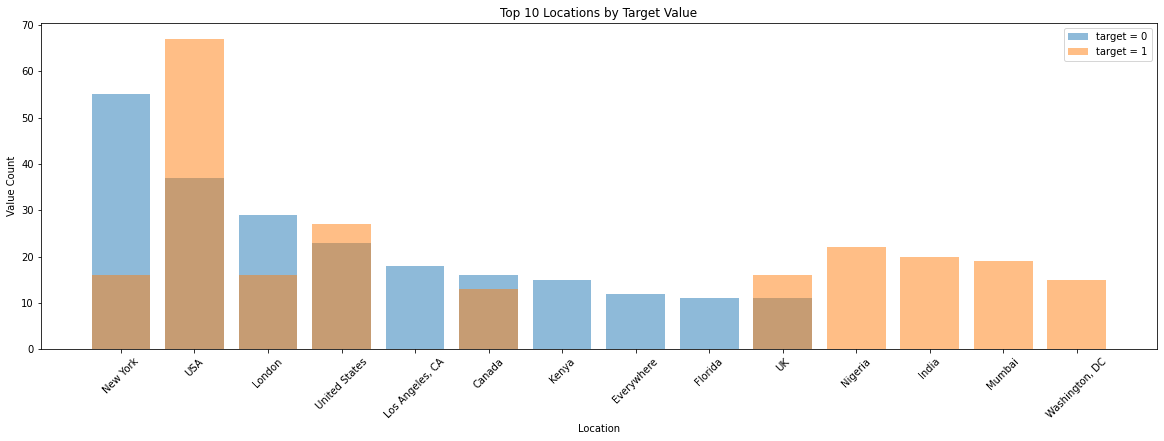

In [37]:
# Create two dataframes based on the target value
df_target_0 = df[df['target'] == 0]
df_target_1 = df[df['target'] == 1]

# Get the top 10 locations for each dataframe
top10_locations_0 = df_target_0['location'].value_counts()[:10]
top10_locations_1 = df_target_1['location'].value_counts()[:10]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the first histogram
ax.bar(top10_locations_0.index, top10_locations_0.values, alpha=0.5, label='target = 0')

# Plot the second histogram
ax.bar(top10_locations_1.index, top10_locations_1.values, alpha=0.5, label='target = 1')

# Set the title and axis labels
ax.set_title('Top 10 Locations by Target Value')
ax.set_xlabel('Location')
ax.set_ylabel('Value Count')
ax.tick_params(axis='x', rotation=45)

# Add a legend and display the plot
ax.legend()
plt.show()


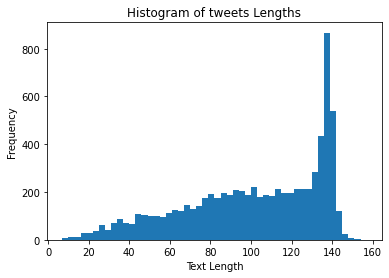

In [22]:
# plotting the lenght of tweets

text_lengths = df['text'].apply(len)

# Create a histogram
plt.hist(text_lengths, bins=50)

# Set the title and axis labels
plt.title('Histogram of tweets Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Display the plot
plt.show()

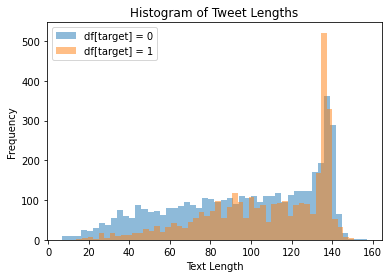

In [23]:
# Create two separate Series objects for each value of df[target]
text_lengths_0 = df.loc[df['target'] == 0, 'text'].apply(len)
text_lengths_1 = df.loc[df['target'] == 1, 'text'].apply(len)

# Create two separate histograms
plt.hist(text_lengths_0, bins=50, alpha=0.5, label='df[target] = 0')
plt.hist(text_lengths_1, bins=50, alpha=0.5, label='df[target] = 1')

# Set the title and axis labels
plt.title('Histogram of Tweet Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Display the plot
plt.show()

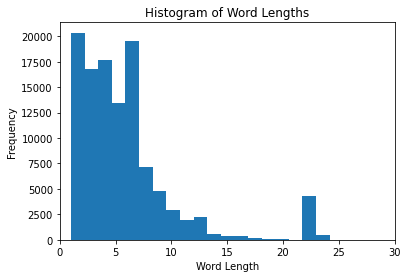

In [12]:
# Split the text in the DataFrame's 'text' column into words
words = df['text'].str.split()

# Get the length of each word and create a flattened list of word lengths
word_lengths = [len(word) for sublist in words for word in sublist]

# Create a histogram
plt.hist(word_lengths, bins=50)

# Set the title and axis labels
plt.title('Histogram of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')

plt.xlim(0, 30)

# Display the plot
plt.show()

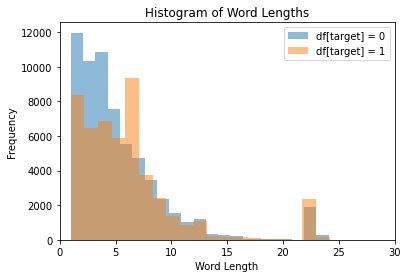

In [34]:
# Create two separate Series objects for each value of df[target]
word_lengths_0 = df.loc[df['target'] == 0, 'text'].str.split().apply(lambda x: [len(word) for word in x]).sum()
word_lengths_1 = df.loc[df['target'] == 1, 'text'].str.split().apply(lambda x: [len(word) for word in x]).sum()

# Create two separate histograms
plt.hist(word_lengths_0, bins=50, alpha=0.5, label='target = 0')
plt.hist(word_lengths_1, bins=50, alpha=0.5, label='target = 1')

# Set the title and axis labels
plt.title('Histogram of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.xlim(0, 30)

# Add a legend
plt.legend()

# Display the plot
plt.show()